<a href="https://colab.research.google.com/github/collinwa/MPCCA/blob/main/development_notebooks/initialization_and_convergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from MPCCA.py import simulate_model_gaussian
from MPCCA.py import mcfa
from MPCCA.py import em
torch.set_printoptions(linewidth = 200)

In [ ]:
def sim_one(p, k, d, n, niter = 100):
  model = simulate_model_gaussian.generate_model(p, k, d)
  data = model.simulate(n)

  all_res = []

  res = mcfa.mcfa(data.Y, n_pcs='all', d=d, k=k, init='avgvar', maxit=niter, verbose=False, delta=None)
  res = pd.DataFrame({'method': ['avgvar']*(niter+1), 'it': range(niter+1), 'l': res.l, 'cd': res.cd})
  all_res.append(res)

  res = mcfa.mcfa(data.Y, n_pcs='all', d=d, k=k, init='avgnorm', maxit=niter, verbose=False, delta=None)
  res = pd.DataFrame({'method': ['avgnorm']*(niter+1), 'it': range(niter+1), 'l': res.l, 'cd': res.cd})
  all_res.append(res)

  res = mcfa.mcfa(data.Y, n_pcs='all', d=d, k=k, init='random', maxit=niter, verbose=False, delta=None)
  res = pd.DataFrame({'method': ['random']*(niter+1), 'it': range(niter+1), 'l': res.l, 'cd': res.cd})
  all_res.append(res)

  res_df = pd.concat(all_res)
  min_l = min(res_df[res_df.it == niter].l)
  res_df['l_norm'] = res_df.l/min_l
  return(res_df)


def sim_many(p, k, d, n, niter = 100, nsims = 10):
  all_res = []
  for i in range(nsims):
    print('Simulation: ' + str(i))
    sim_res = sim_one(p, k, d, n, niter)
    sim_res['sim'] = i
    all_res = all_res + [sim_res]
  return(pd.concat(all_res))

In [ ]:
sim_res = sim_many(p=[30, 40, 60], k=None, d=10, n=1000, niter=1000, nsims=10)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9


In [ ]:
sim_res.groupby(['method', 'it']).median().pivot_table(index='method', columns='it', values='l_norm')# .iloc[:, 0:200]

it,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
method,,,,,,,,,,,,,,,,,,,,,
avgnorm,1.048682,1.018709,1.010092,1.006026,1.003782,1.002434,1.001617,1.001190,1.000923,1.000735,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
avgvar,1.021576,1.004337,1.002009,1.001198,1.000805,1.000592,1.000475,1.000401,1.000348,1.000308,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000
random,3.450024,1.629092,1.445512,1.311670,1.225125,1.173945,1.145911,1.132000,1.124864,1.121336,...,1.00196,1.001956,1.001952,1.001948,1.001944,1.00194,1.001936,1.001932,1.001928,1.001924


In [ ]:
sim_res.groupby(['method', 'it']).median().pivot_table(index='method', columns='it', values='cd')

it,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
method,,,,,,,,,,,,,,,,,,,,,
avgnorm,0.000087,0.000039,0.000030,0.000026,0.000024,0.000023,0.000023,0.000023,0.000023,0.000023,...,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022
avgvar,0.000028,0.000024,0.000024,0.000024,0.000023,0.000023,0.000023,0.000023,0.000023,0.000023,...,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022,0.000022
random,11.242756,32.630660,19.328918,15.742623,14.379064,13.701827,13.252342,12.902300,12.604942,12.339164,...,0.010067,0.010038,0.010009,0.009981,0.009953,0.009925,0.009896,0.009868,0.009841,0.009813


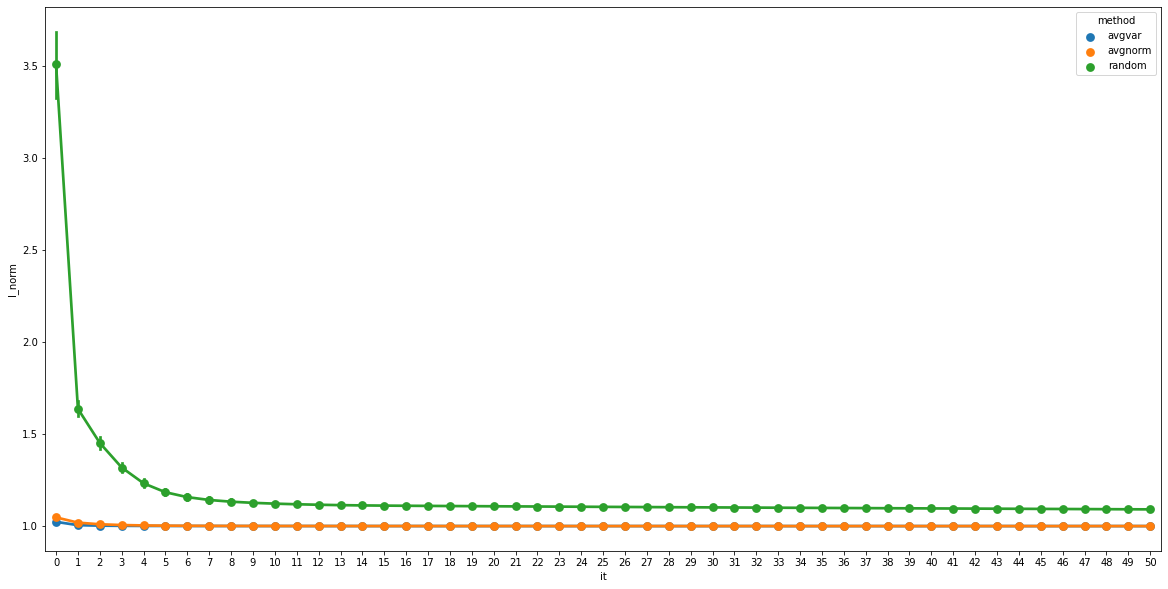

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.pointplot(data=sim_res[sim_res.it <= 50], x='it', y='l_norm', hue='method')
plt.show()

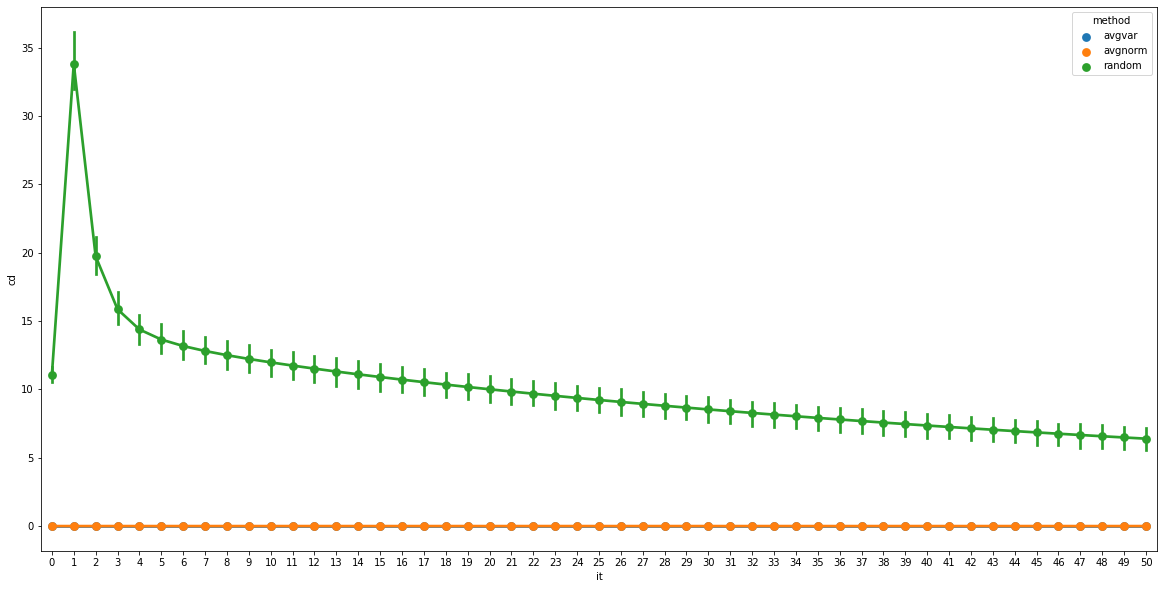

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.pointplot(data=sim_res[sim_res.it <= 50], x='it', y='cd', hue='method')
plt.show()

In [ ]:
sim_res = sim_many(p=[30, 40, 60], k=[8, 11, 15], d=10, n=1000, niter=1000, nsims=10)

Simulation: 0
Simulation: 1
Simulation: 2
Simulation: 3
Simulation: 4
Simulation: 5
Simulation: 6
Simulation: 7
Simulation: 8
Simulation: 9


In [ ]:
sim_res.groupby(['method', 'it']).median().pivot_table(index='method', columns='it', values='l_norm')

it,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
method,,,,,,,,,,,,,,,,,,,,,
avgnorm,1.297774,1.181734,1.115448,1.078985,1.059674,1.048314,1.040281,1.034320,1.029762,1.026312,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
avgvar,1.024393,1.006394,1.002033,1.000797,1.000336,1.000139,1.000044,0.999999,0.999977,0.999964,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
random,3.676090,3.014764,2.441011,2.048604,1.787849,1.611382,1.500642,1.424933,1.378022,1.346411,...,1.000003,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002


In [ ]:
sim_res.groupby(['method', 'it']).median().pivot_table(index='method', columns='it', values='cd')

it,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
method,,,,,,,,,,,,,,,,,,,,,
avgnorm,0.001725,0.001761,0.001791,0.001811,0.001818,0.001818,0.001813,0.001805,0.001795,0.001783,...,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203
avgvar,0.000206,0.000204,0.000204,0.000203,0.000202,0.000202,0.000201,0.000201,0.000201,0.000200,...,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203,0.000203
random,17.896824,8.988149,4.637418,3.547523,3.128238,2.909576,2.773304,2.674614,2.596647,2.529863,...,0.000211,0.000211,0.000211,0.000211,0.000211,0.000211,0.000210,0.000210,0.000210,0.000210


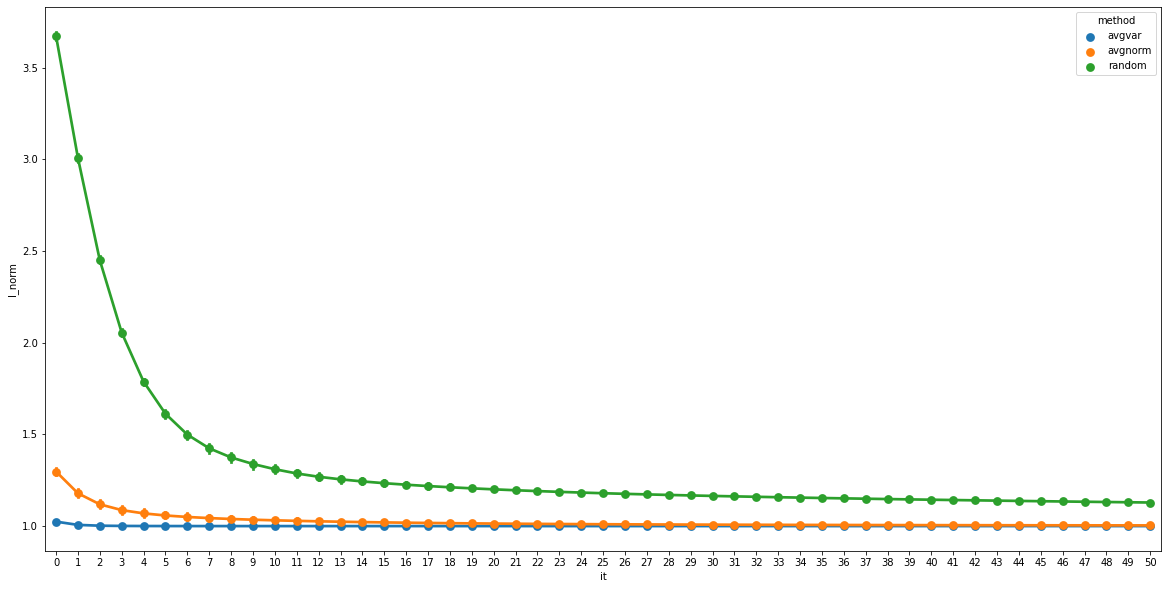

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.pointplot(data=sim_res[sim_res.it <= 50], x='it', y='l_norm', hue='method')
plt.show()

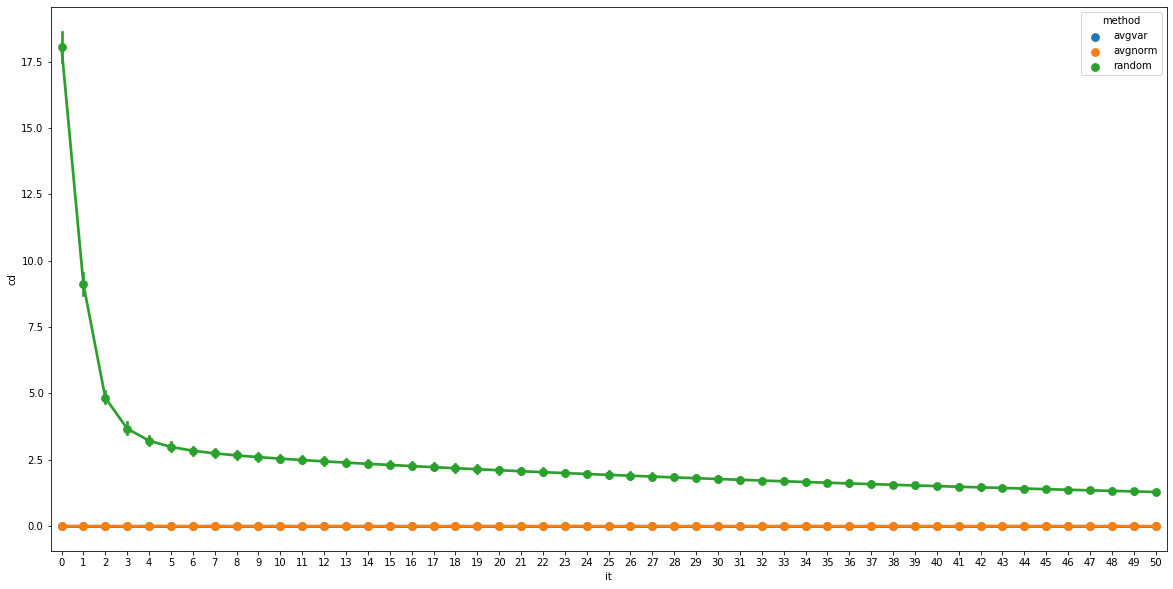

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.pointplot(data=sim_res[sim_res.it <= 50], x='it', y='cd', hue='method')
plt.show()